In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

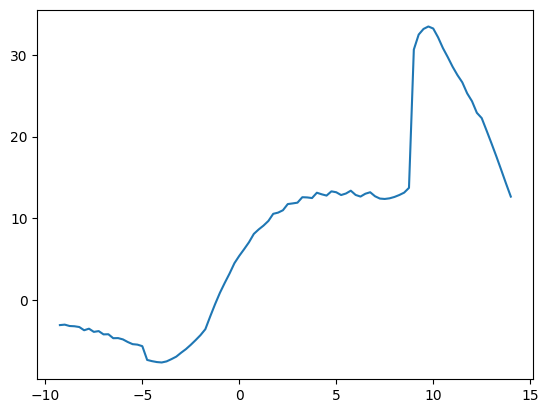

In [79]:
data_ext = pd.read_csv("data_ext.csv")
coefs_ext = data_ext["Cl"] / data_ext["Cd"]
plt.plot(data_ext["Alpha"], coefs_ext)

In [80]:
angles_int = [0.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.5]
coefs_int = [
    1.7820,
    3.5897,
    7.3729,
    12.7475,
    18.8323,
    22.8308,
    29.5496
]

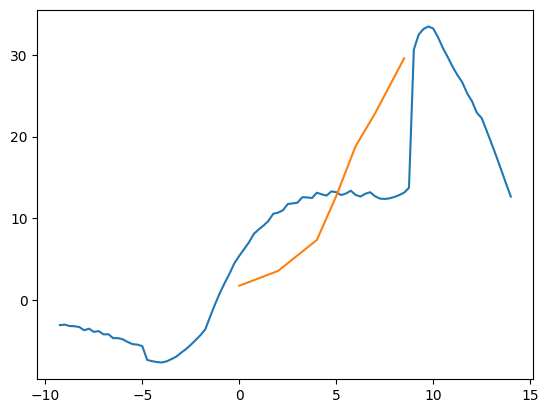

In [81]:
plt.plot(data_ext["Alpha"], coefs_ext)
plt.plot(angles_int, coefs_int)

In [82]:
def func(x,a,b,c):
    return a*(x+b)**2+c

popt, pcov = curve_fit(func, angles_int, coefs_int)
print(pcov)
print(popt)

[[ 0.0060974  -0.09538459  0.1169399 ]
 [-0.09538459  1.58775988 -2.18405575]
 [ 0.1169399  -2.18405575  3.86496869]]
[0.33039696 0.97141581 0.97680438]


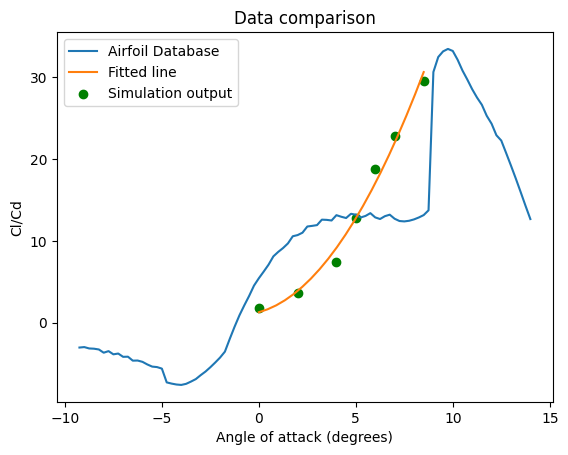

In [83]:
x_range = np.linspace(angles_int[0], angles_int[-1], 20, endpoint=True)
plt.plot(data_ext["Alpha"], coefs_ext, label="Airfoil Database")
plt.plot(x_range, func(x_range, *popt), label="Fitted line")
plt.scatter(angles_int, coefs_int, color='g', label="Simulation output")
plt.xlabel("Angle of attack (degrees)")
plt.ylabel("Cl/Cd")
plt.legend() 
plt.title('Data comparison')
plt.savefig('plot.png', dpi=300)